<a href="https://colab.research.google.com/github/jveyccan/study-materials/blob/main/KMeans-from-scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('Income_Data.csv')
data.head()


,Years,Income
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


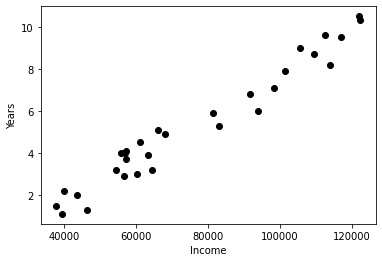

In [37]:
X = data[["Years","Income"]]
#Visualise data points
plt.scatter(X["Income"],X["Years"],c='black')
plt.xlabel('Income')
plt.ylabel('Years')
plt.show()

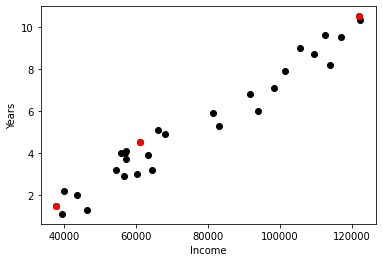

In [38]:
K=3

Centroids = (X.sample(n=K))
plt.scatter(X["Income"],X["Years"],c='black')
plt.scatter(Centroids["Income"],Centroids["Years"],c='red')
plt.xlabel('Income')
plt.ylabel('Years')
plt.show()

In [39]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Income"]-row_d["Income"])**2
            d2=(row_c["Years"]-row_d["Years"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Years","Income"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Years'] - Centroids['Years']).sum() + (Centroids_new['Income'] - Centroids['Income']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Years","Income"]]


0.0


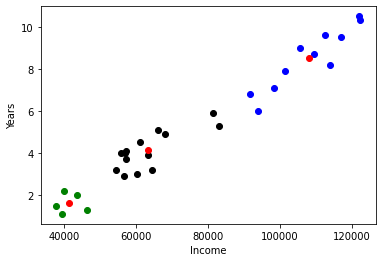

In [40]:
color=['blue','green','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Income"],data["Years"],c=color[k])
plt.scatter(Centroids["Income"],Centroids["Years"],c='red')
plt.xlabel('Income')
plt.ylabel('Years')
plt.show()